## Calculate national-level intersects of butterfly data

* Read in the butterfly data
* Read in national shapes
* Count intersecting points for a given national shape
* Create a simple data table, export as csv

In [1]:
import pandas as pd
import geopandas as gpd
from geopandas.tools import sjoin
import shapely
#import numpy as np
#from geopandas.tools import overlay
%matplotlib inline

In [2]:
df = pd.read_csv('../GBIF_data/output.csv')
df.head()

,decimallatitude,decimallongitude,date,year,species
0,50.97904,3.10683,2000-09-01,2000,3
1,50.84415,2.89347,2003-05-28,2003,3
2,51.11305,3.46429,2000-06-20,2000,3
3,51.11305,3.46429,2000-06-25,2000,3
4,51.11305,3.46429,2000-07-20,2000,3


In [3]:
def point_maker(lon, lat):
    return shapely.geometry.Point(lon, lat)

In [4]:
rows =[]
points = []
for val in df.values:
    lat, lon, date, year, species = val
    points.append(point_maker(lon,lat))
    rows.append([ date, year, species])

series = gpd.GeoDataFrame(rows, crs={'init':'epsg:4326'}, geometry=points, columns=['date','year','species'])
series.head()

,date,year,species,geometry
0,2000-09-01,2000,3,POINT (3.10683 50.97904000000001)
1,2003-05-28,2003,3,POINT (2.89347 50.84415)
2,2000-06-20,2000,3,POINT (3.46429 51.11305)
3,2000-06-25,2000,3,POINT (3.46429 51.11305)
4,2000-07-20,2000,3,POINT (3.46429 51.11305)


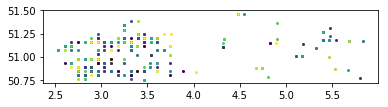

In [9]:
series[0:1000].plot()

In [5]:
nations = gpd.read_file('/Users/Ben/Downloads/TM_WORLD_BORDERS-0/TM_WORLD_BORDERS-0.3.shp')

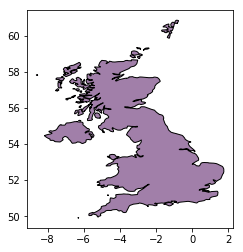

In [6]:
nations[nations.NAME == 'United Kingdom'].plot()

In [7]:
uk = nations[nations.NAME == 'United Kingdom']
uk

,AREA,FIPS,ISO2,ISO3,LAT,LON,NAME,POP2005,REGION,SUBREGION,UN,geometry
206,24193,UK,GB,GBR,53.0,-1.6,United Kingdom,60244834,150,154,826,"(POLYGON ((-6.290832999999964 49.912216, -6.31..."


In [8]:
print(uk.crs)
print(series.crs)

{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


In [10]:
assert uk.crs == series.crs

AssertionError: 

In [ ]:
#uk.intersects(series.geometry[0])
mask = []
for coord in series.geometry:
   # print(coord)
    tmp = uk.intersects(coord)
    mask.append(tmp.values[0])

In [ ]:
mask = np.array(mask)

In [ ]:
msk = []
for p in series.geometry:
    tmp = uk.intersects(p)
    msk.append(tmp.values)
#     if tmp.values == True:
#         print("In the If")
#         print(uk.intersects(p))

In [11]:
%%time
per_country_sightings = sjoin(series, uk, how='inner', op='intersects')

CPU times: user 49.3 s, sys: 628 ms, total: 49.9 s
Wall time: 50.9 s


In [12]:
per_country_sightings.head()

,date,year,species,geometry,index_right,AREA,FIPS,ISO2,ISO3,LAT,LON,NAME,POP2005,REGION,SUBREGION,UN
52640,2010-07-15,2010,3,POINT (-4.65683 55.58655),206,24193,UK,GB,GBR,53.0,-1.6,United Kingdom,60244834,150,154,826
52641,2011-07-22,2011,3,POINT (-3.64131 55.89191999999999),206,24193,UK,GB,GBR,53.0,-1.6,United Kingdom,60244834,150,154,826
52642,2013-08-02,2013,3,POINT (-3.64131 55.89191999999999),206,24193,UK,GB,GBR,53.0,-1.6,United Kingdom,60244834,150,154,826
52643,2006-07-28,2006,3,POINT (-3.64131 55.89191999999999),206,24193,UK,GB,GBR,53.0,-1.6,United Kingdom,60244834,150,154,826
52644,2000-09-16,2000,3,POINT (-3.58857 55.89261),206,24193,UK,GB,GBR,53.0,-1.6,United Kingdom,60244834,150,154,826


In [39]:
for species in range(1,9):
    tmp = per_country_sightings[per_country_sightings.species == species]
    tmp = tmp[tmp.year >= 2000]
    tmp = tmp[tmp.year <= 2015]
    print('Species {0} has len {1} (All time)'.format(species, len(tmp)))
    break

Species 1 has len 22957 (All time)


In [49]:
def species_sightings_in_time(df):
    """Return a dictionary with counts of species sightings per 4 year period,
    (eg from start of year 2000 to end of year 2003).
    Input dataframe should be per country (from the intersect operation)
    """
    d = {}
    year_increment = 3
    for start in [2000, 2004, 2008, 2012]:
        end = start + year_increment
        for species in range(1,9):
            tmp = df[df.species == species]
            tmp = tmp[tmp.year >= start]
            tmp = tmp[tmp.year <= end]
            var_name = 'S{0}_{1}_{2}'.format(species, start, end)
            d[var_name] = len(tmp)
    return d
            #if species ==1:
            #    print('S{0}_{1}_{2} counts = {3}'.format(species, start, end, len(tmp)))


In [75]:
uk.ISO3.values[0]

'GBR'

In [ ]:
d = {} # This outside extraction of per country shape

#d[uk.ISO3.values[0]]
year_increment = 3
for start in [2000, 2004, 2008, 2012]:
    end = start + year_increment
    for species in range(1,9):
        tmp = per_country_sightings[per_country_sightings.species == species]
        tmp = tmp[tmp.year >= start]
        tmp = tmp[tmp.year <= end]
        time_key = '{1}_{2}'.format(start, end)
        s_num = 'S{0}'.format(species)
        d[var_name] = len(tmp)
return d
        #if species ==1:
        #    print('S{0}_{1}_{2} counts = {3}'.format(species, start, end, len(tmp)))



In [50]:
national_counts_in_time = species_sightings_in_time(per_country_sightings)

In [103]:
national_counts_in_time

{'S1_2000_2003': 4135,
 'S1_2004_2007': 6490,
 'S1_2008_2011': 5726,
 'S1_2012_2015': 6606,
 'S2_2000_2003': 2668,
 'S2_2004_2007': 4132,
 'S2_2008_2011': 4978,
 'S2_2012_2015': 5137,
 'S3_2000_2003': 4129,
 'S3_2004_2007': 6292,
 'S3_2008_2011': 7769,
 'S3_2012_2015': 9295,
 'S4_2000_2003': 0,
 'S4_2004_2007': 0,
 'S4_2008_2011': 0,
 'S4_2012_2015': 12,
 'S5_2000_2003': 2579,
 'S5_2004_2007': 2453,
 'S5_2008_2011': 3129,
 'S5_2012_2015': 2068,
 'S6_2000_2003': 0,
 'S6_2004_2007': 0,
 'S6_2008_2011': 0,
 'S6_2012_2015': 0,
 'S7_2000_2003': 0,
 'S7_2004_2007': 0,
 'S7_2008_2011': 0,
 'S7_2012_2015': 0,
 'S8_2000_2003': 3,
 'S8_2004_2007': 23,
 'S8_2008_2011': 47,
 'S8_2012_2015': 71}

In [105]:
df = pd.read_csv('../GBIF_data/national_sightings_in_time.csv')

In [106]:
df.head()

,ISO3,S1_2000_2003,S1_2004_2007,S1_2008_2011,S1_2012_2015,S2_2000_2003,S2_2004_2007,S2_2008_2011,S2_2012_2015,S3_2000_2003,...,S6_2008_2011,S6_2012_2015,S7_2000_2003,S7_2004_2007,S7_2008_2011,S7_2012_2015,S8_2000_2003,S8_2004_2007,S8_2008_2011,S8_2012_2015
0,BEL,13602,27260,25500,29679,8369,14999,16559,15382,8269,...,7834,11263,0,0,3,0,5,30,89,197
1,GBR,4135,6490,5726,6606,2668,4132,4978,5137,4129,...,0,0,0,0,0,0,3,23,47,71
2,DEU,241,271,3057,8104,297,347,2713,5519,214,...,1398,3692,5,14,116,340,15,15,190,246
3,DNK,77,1234,406,888,6,379,382,1578,21,...,386,429,0,0,1,57,32,98,118,212
4,ITA,8,18,68,95,12,17,43,8,13,...,1,0,1,0,0,7,1,6,2,1


In [122]:
df.S1_2000_2003[0]

13602

In [127]:
df = pd.read_csv('../GBIF_data/national_sightings_in_time.csv')

d = {}
for start in [2000, 2004, 2008, 2012]:
    end = start + year_increment
    time_string = '{0}_{1}'.format(start, end)
    country_dic = {}
    for country_index in df.index:
        tmp_dic = {}
        species_dic = {}
        for snum in range(1,9):
            df_key = 'S{species}_{time}'.format(species=snum, time=time_string)
            species_dic['S{0}'.format(snum)] = df[df_key][country_index]
        country_dic[df.ISO3[country_index]] = species_dic
    d[time_string] = country_dic

pprint(d)

{'2000_2003': {'BEL': {'S1': 13602,
                       'S2': 8369,
                       'S3': 8269,
                       'S4': 0,
                       'S5': 8791,
                       'S6': 6038,
                       'S7': 0,
                       'S8': 5},
               'CHE': {'S1': 1514,
                       'S2': 2540,
                       'S3': 974,
                       'S4': 0,
                       'S5': 1859,
                       'S6': 385,
                       'S7': 22,
                       'S8': 96},
               'DEU': {'S1': 241,
                       'S2': 297,
                       'S3': 214,
                       'S4': 0,
                       'S5': 181,
                       'S6': 125,
                       'S7': 5,
                       'S8': 15},
               'DNK': {'S1': 77,
                       'S2': 6,
                       'S3': 21,
                       'S4': 2,
                       'S5': 195,
                       

In [128]:
df.tail()

,ISO3,S1_2000_2003,S1_2004_2007,S1_2008_2011,S1_2012_2015,S2_2000_2003,S2_2004_2007,S2_2008_2011,S2_2012_2015,S3_2000_2003,...,S6_2008_2011,S6_2012_2015,S7_2000_2003,S7_2004_2007,S7_2008_2011,S7_2012_2015,S8_2000_2003,S8_2004_2007,S8_2008_2011,S8_2012_2015
6,PRT,0,0,0,9,1,0,2,0,7,...,0,0,1,0,0,0,0,0,0,0
7,CHE,1514,2129,941,21,2540,2454,1509,2,974,...,539,0,22,53,29,0,96,203,112,0
8,SWE,532,4641,4622,3751,1196,7565,8403,5415,670,...,1881,1207,0,0,14,2,24,135,340,551
9,NOR,42,130,1220,1667,55,80,1439,1245,9,...,0,0,0,0,0,0,0,0,0,0
10,FIN,930,1367,3341,1824,2279,3038,6020,3763,283,...,690,929,3,76,344,385,39,209,360,324


In [119]:
d

{'2000_2003': 'FIN',
 '2004_2007': 'FIN',
 '2008_2011': 'FIN',
 '2012_2015': 'FIN'}

In [76]:
keys = ['ISO3','S1_2000_2003','S1_2004_2007','S1_2008_2011','S1_2012_2015','S2_2000_2003',
        'S2_2004_2007','S2_2008_2011','S2_2012_2015','S3_2000_2003','S3_2004_2007',
        'S3_2008_2011','S3_2012_2015','S4_2000_2003','S4_2004_2007','S4_2008_2011',
        'S4_2012_2015','S5_2000_2003','S5_2004_2007','S5_2008_2011','S5_2012_2015',
        'S6_2000_2003','S6_2004_2007','S6_2008_2011','S6_2012_2015','S7_2000_2003','S7_2004_2007',
        'S7_2008_2011','S7_2012_2015','S8_2000_2003','S8_2004_2007','S8_2008_2011','S8_2012_2015']

def extract_specific_order(d, keys):
    vals = [uk.ISO3.values[0]]   # <<<< CHANGE THIS
    # country key in first place 
    for key in keys[1:]:
        vals.append(d[key])
    return vals

vals = extract_specific_order(national_counts_in_time, keys)

pd.DataFrame([vals], columns=keys)

,ISO3,S1_2000_2003,S1_2004_2007,S1_2008_2011,S1_2012_2015,S2_2000_2003,S2_2004_2007,S2_2008_2011,S2_2012_2015,S3_2000_2003,...,S6_2008_2011,S6_2012_2015,S7_2000_2003,S7_2004_2007,S7_2008_2011,S7_2012_2015,S8_2000_2003,S8_2004_2007,S8_2008_2011,S8_2012_2015
0,GBR,4135,6490,5726,6606,2668,4132,4978,5137,4129,...,0,0,0,0,0,0,3,23,47,71


In [60]:
national_counts_in_time.values()

dict_values([4129, 71, 0, 2668, 4135, 0, 0, 3, 5137, 2579, 0, 6292, 9295, 47, 5726, 6606, 0, 12, 0, 4978, 0, 6490, 0, 4132, 2453, 7769, 2068, 0, 23, 0, 3129, 0])

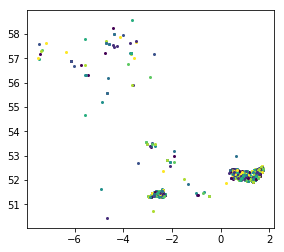

In [23]:
uk_points[0::100].plot()

In [13]:
grouped_uk = uk_points.groupby(['year', 'species', 'ISO3'])

In [25]:
grouped_uk = uk_points.groupby(['year','species', 'ISO3'])
grouped_uk.sum()

index_right      AREA       LAT     LON       POP2005  \
year species ISO3                                                          
1998 1       GBR        173658  20394699   44679.0 -1348.8   50786395062   
     2       GBR        241432  28354196   62116.0 -1875.2   70606945448   
     3       GBR        242050  28426775   62275.0 -1880.0   70787679950   
     5       GBR         42436   4983758   10918.0  -329.6   12410435804   
     8       GBR           206     24193      53.0    -1.6      60244834   
1999 1       GBR        193022  22668841   49661.0 -1499.2   56449409458   
     2       GBR        282838  33216989   72769.0 -2196.8   82716157082   
     3       GBR        228866  26878423   58883.0 -1777.6   66932010574   
     5       GBR         29870   3507985    7685.0  -232.0    8735500930   
     8       GBR           206     24193      53.0    -1.6      60244834   
2000 1       GBR        203322  23878491   52311.0 -1579.2   59461651158   
     2       GBR        170156  19983418   43778.0 -1321.6   49762232884   
     3       GBR        181074  21265647   46587.0 -1406.4   52955209086   
     5       GBR        106502  12507781   27401.0  -827.2   31146579178   
     8       GBR           206     24193      53.0    -1.6      60244834   
2001 1       GBR        166036  19499558   42718.0 -1289.6   48557336204   
     2       GBR        112476  13209378   28938.0  -873.6   32893679364   
     3       GBR        175512  20612436   45156.0 -1363.2   51328598568   
     5       GBR         30282   3556371    7791.0  -235.2    8855990598   
2002 1       GBR        129162  15169011   33231.0 -1003.2   37773510918   
     2       GBR        100734  11830377   25917.0  -782.4   29459723826   
     3       GBR        179014  21023717   46057.0 -1390.4   52352760746   
     5       GBR         79516   9338498   20458.0  -617.6   23254505924   
2003 1       GBR        353290  41490995   90895.0 -2744.0  103319890310   
     2       GBR        166242  19523751   42771.0 -1291.2   48617581038   
     3       GBR        314974  36991097   81037.0 -2446.4   92114351186   
     5       GBR        314974  36991097   81037.0 -2446.4   92114351186   
     8       GBR           412     48386     106.0    -3.2     120489668   
2004 1       GBR        170362  20007611   43831.0 -1323.2   49822477718   
     2       GBR        240196  28209038   61798.0 -1865.6   70245476444   
...                        ...       ...       ...     ...           ...   
2011 2       GBR        273362  32104111   70331.0 -2123.2   79944894718   
     3       GBR        305292  35854026   78546.0 -2371.2   89282843988   
     5       GBR         33578   3943459    8639.0  -260.8    9819907942   
     8       GBR          3090    362895     795.0   -24.0     903672510   
2012 1       GBR        226188  26563914   58194.0 -1756.8   66148827732   
     2       GBR        184782  21701121   47541.0 -1435.2   54039616098   
     3       GBR        201880  23709140   51940.0 -1568.0   59039937320   
     5       GBR         25338   2975739    6519.0  -196.8    7410114582   
     8       GBR          1030    120965     265.0    -8.0     301224170   
2013 1       GBR        175924  20660822   45262.0 -1366.4   51449088236   
     2       GBR        277688  32612164   71444.0 -2156.8   81210036232   
     3       GBR        440016  51676248  113208.0 -3417.6  128682965424   
     5       GBR         87756  10306218   22578.0  -681.6   25664299284   
     8       GBR          1854    217737     477.0   -14.4     542203506   
2014 1       GBR        516030  60603465  132765.0 -4008.0  150913309170   
     2       GBR        289636  34015358   74518.0 -2249.6   84704236604   
     3       GBR        475860  55885830  122430.0 -3696.0  139165566540   
     4       GBR          1236    145158     318.0    -9.6     361469004   
     5       GBR         78074   9169147   20087.0  -606.4   22832792086   
     8       GBR          4326    508053    1113.0   -33.6    12651

In [42]:
tmp1 = uk_points[uk_points['year']>2010]
print(len(tmp1))
tmp1 = tmp1[tmp1['year'] < 2012]
print(len(tmp1))
tmp1.head()

28105
4817


,date,year,species,geometry,index_right,AREA,FIPS,ISO2,ISO3,LAT,LON,NAME,POP2005,REGION,SUBREGION,UN
52641,2011-07-22,2011,3,POINT (-3.64131 55.89191999999999),206,24193,UK,GB,GBR,53.0,-1.6,United Kingdom,60244834,150,154,826
52647,2011-04-27,2011,3,POINT (-3.64131 55.89191999999999),206,24193,UK,GB,GBR,53.0,-1.6,United Kingdom,60244834,150,154,826
52660,2011-07-29,2011,3,POINT (-3.64131 55.89191999999999),206,24193,UK,GB,GBR,53.0,-1.6,United Kingdom,60244834,150,154,826
52661,2011-04-25,2011,3,POINT (-3.64131 55.89191999999999),206,24193,UK,GB,GBR,53.0,-1.6,United Kingdom,60244834,150,154,826
52662,2011-05-01,2011,3,POINT (-3.64131 55.89191999999999),206,24193,UK,GB,GBR,53.0,-1.6,United Kingdom,60244834,150,154,826
